In [1]:
import tensorflow as tf
import cv2
import numpy as np
from AE_model import outlier_model

In [2]:
# initialize the number of epochs to train for, initial learning rate,
# and batch size
img_width, img_height = 220, 220
BS = 36

In [3]:
# from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D, Flatten, Activation
# from tensorflow.keras.models import Sequential, Model
# input_img = Input(batch_shape=(None, img_width, img_width, 3))

# x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# encoded = MaxPooling2D((2, 2), padding='same')(x)

# # at this point the representation is (4, 4, 8) i.e. 128-dimensional

# x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
# x = Conv2D(16, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# autoencoder = Model(input_img, decoded)

# autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# autoencoder.summary()

In [4]:
import pathlib
data_dir = pathlib.Path('img_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != ".DS_Store"]))
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

images, labels = next(img_gen.flow_from_directory(data_dir, batch_size=BS, target_size=(220, 220), class_mode="sparse", shuffle=False))
if len(images) is not None:
    print('{0} images loaded successfully from classes{1}'.format(len(images), class_names))
    print(labels)
images.shape
print(class_names)
print("Shape: ", images[0].shape)
print("Label: ", class_names[0], "->", labels[0])

Found 36 images belonging to 4 classes.
36 images loaded successfully from classes['Insolator_type1' 'Insolator_type2' 'Vibration Damper' 'new_1']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2.]
['Insolator_type1' 'Insolator_type2' 'Vibration Damper' 'new_1']
Shape:  (220, 220, 3)
Label:  Insolator_type1 -> 0.0


In [5]:
# from datetime import datetime
# # Sets up a timestamped log directory.
# logdir = "logs/train_data/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# # Creates a file writer for the log directory.
# file_writer = tf.summary.create_file_writer(logdir)
# # Using the file writer, log the reshaped image.
# with file_writer.as_default():
#     # Reshape the image for the Summary API.
#     img = np.reshape(images[0:36], (-1, img_width, img_height, 3))# Reshape the image for the Summary API.
#     tf.summary.image("Training data", images, max_outputs=36, step=0)

In [6]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# images, labels = train_ds
# print(lw)
# for images, labels in train_ds.take(1):
#     for i in range(9):
#         ax = plt.subplot(3, 3, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(class_names[labels[i]])
#         plt.axis("off")

In [7]:
model = outlier_model(img_width, img_height)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 220, 220, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 220, 220, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 16)       

In [8]:
# from aencod_utils import ConvAutoencoder
# from tensorflow.keras.optimizers import Adam

# from aencod_build import visualize_predictions
# print("[INFO] building autoencoder...")
# (encoder, decoder, autoencoder) = ConvAutoencoder.build(256, 256, 3)
# opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# autoencoder.compile(loss="mse", optimizer=opt)
# # train the convolutional autoencoder
# H = autoencoder.fit(
#     images, images,
#     validation_data=(images, images),
#     epochs=EPOCHS,
#     batch_size=BS)
# # use the convolutional autoencoder to make predictions on the
# # testing images, construct the visualization, and then save it
# # to disk
# print("[INFO] making predictions...")
# decoded = autoencoder.predict(images)
# vis = visualize_predictions(decoded, images)
# cv2.imwrite('reshap.png', vis)

In [9]:
import time
name_model  = "dr4e_vis-{}".format(int(time.time()))
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs/{}'.format(name_model))
history = model.fit(images, images, epochs=350, batch_size=6, validation_data=(images, images), callbacks=[tensorboard_cb])
model.save_weights('recons4_det.h5')

Epoch 1/350
1/6 [====>.........................] - ETA: 0s - loss: 0.0474 - accuracy: 0.4021WARNING:tensorflow:From /Users/nomi/Desktop/virtual-envs/tf2-py3.8/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
6/6 [==============================] - 3s 439ms/step - loss: 0.0449 - accuracy: 0.3147 - val_loss: 0.0413 - val_accuracy: 0.2145
Epoch 2/350
6/6 [==============================] - 2s 409ms/step - loss: 0.0394 - accuracy: 0.3883 - val_loss: 0.0395 - val_accuracy: 0.4957
Epoch 3/350
6/6 [==============================] - 2s 405ms/step - loss: 0.0394 - accuracy: 0.4957 - val_loss: 0.0379 - val_accuracy: 0.4957
Epoch 4/350
6/6 [==============================] - 2s 409ms/step - loss: 0.0374 - accuracy: 0.4956 - val_loss: 0.0358 - val_accuracy: 0.4960
Epoch 5/350
6/6 [=============================

KeyboardInterrupt: 

In [10]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir logs

In [11]:
model.load_weights('recons3_det.h5');

In [12]:
import matplotlib.pyplot as plt
# %matplotlib inline
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

def reshape (img):
    img = (cv2.resize(cv2.imread(img), (220, 220)))
    img = img * 1./255
    img = img.reshape([-1, img_width, img_height,3])
    return img

def CheckAnomaly(model, val_img, test_img, threshold):
    val_img = reshape(val_img)
    test_img = reshape(test_img)
    pred_img = model.predict(val_img)
    val_mse = mse(pred_img[0], val_img[0])
    test_mse = mse(pred_img[0], test_img[0])
    plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(val_img[0])
    plt.axis('off')
    plt.title('Oroginal Image')
    plt.subplot(1,3,2)
    plt.imshow(pred_img[0])
    plt.axis('off')
    plt.title('Reconstructed Image')
    plt.subplot(1,3,3)
    plt.imshow(test_img[0])
    plt.axis('off')
    plt.title('Test Image')
    print('validate_mse: {}'.format(val_mse))
    print('Test_mse: {}'.format(test_mse))
    if test_mse  > threshold:
        print("Image is anomalous")
    else:
        print("Image is not anomalious")
    return test_mse  > threshold

validate_mse: 0.010671729513662303
Test_mse: 0.21792380158322971
Image is anomalous


True

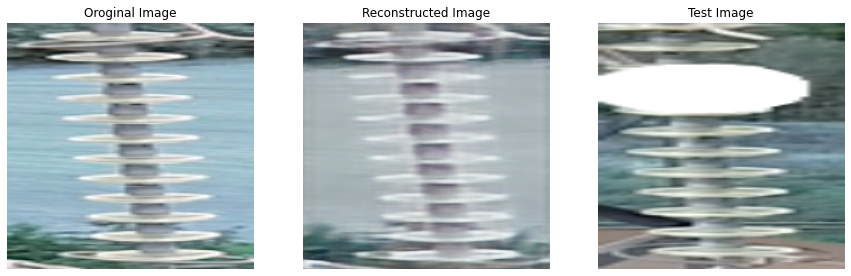

In [13]:
org_img = 'img_data/train/insolator_type1/insov1-12.png'
# org_img = 'img_data/insov1-24.png'
validation_img = 'img_data/insov1-1.png'
CheckAnomaly(model, org_img, validation_img, threshold=0.04)